# 📧 SMS Spam Detection System using Machine Learning

A complete end-to-end machine learning project to classify SMS messages as spam or ham (not spam).  
We use classical supervised learning techniques, perform EDA, evaluate model performance using multiple metrics, and deploy the model.



## 🎯 Problem Statement

With the rise in unsolicited SMS messages, there's a need to build systems that can automatically classify incoming messages as **spam** or **ham (legitimate)**. This project aims to:

- Perform exploratory data analysis on real-world SMS messages
- Clean and preprocess the textual data
- Build and evaluate ML models for spam classification
- Deploy a functional model that can predict new messages


## 📂 Dataset Description

- **Name**: SMS Spam Collection Dataset  
- **Source**: [UCI Machine Learning Repository / Kaggle](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)
- **Format**: CSV  
- **Columns**:
    - `v1`: label (spam or ham)
    - `v2`: message text  
- **Samples**: ~5,500 labeled messages


## 🧰 Tools & Technologies

- **Language**: Python  
- **Libraries**:
    - pandas, numpy, matplotlib, seaborn — for EDA & preprocessing
    - sklearn — for ML models & evaluation
    - nltk — for text cleaning
    - wordcloud — for text visualization
- **Model Algorithms**:
    - Naive Bayes
    - Logistic Regression
- **Deployment**:
    - Streamlit / Flask (optional)
- **Environment**: Jupyter Notebook


## 📈 Project Workflow

1. **Load Dataset**
2. **Explore and Visualize**
3. **Clean and Preprocess Text**
4. **Vectorize Text using TF-IDF / CountVectorizer**
5. **Train & Evaluate Models**
6. **Visualize Results and Interpret Metrics**
7. **Deploy the Final Model** (Optional)
8. **Document + Write Medium Blog**


# 🧪 Phase 1: Exploratory Data Analysis (EDA)

## 🔍 Step 1: Import Libraries and Load Data

We start by importing the necessary libraries and loading the dataset.


In [8]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("../data/spam.csv", encoding='latin-1')[['v1', 'v2']] #If you don't write v1 and v2 then 3 unecessary columns will be generated.

# Display the first few rows
#df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 🧹 Step 2: Clean Dataset

We'll drop irrelevant columns and rename for simplicity:
- `v1` → `label`
- `v2` → `message`

In [10]:
# Keep only relevant columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Check shape and info
df.shape, df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 📊 Step 3: Check for Missing Values and Label Distribution

We explore the class balance and check for nulls.

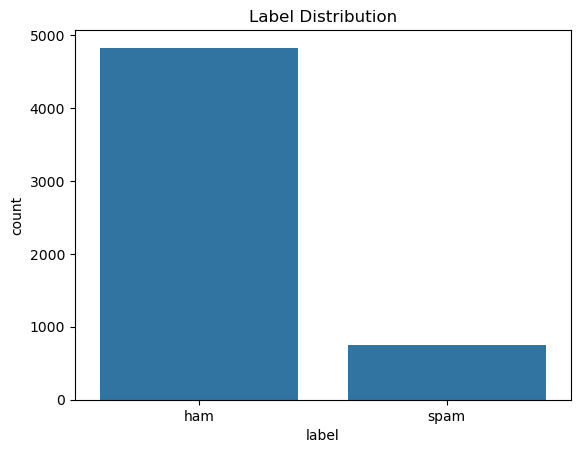

label
ham     4825
spam     747
Name: count, dtype: int64

In [14]:
# Check for nulls
df.isnull().sum()

# Label distribution
sns.countplot(x='label', data=df)
plt.title('Label Distribution')
plt.show()

# Count actual values
df['label'].value_counts()


## 🧮 Step 4: Message Length Analysis

Do spam and ham messages differ in length? Let’s visualize it.


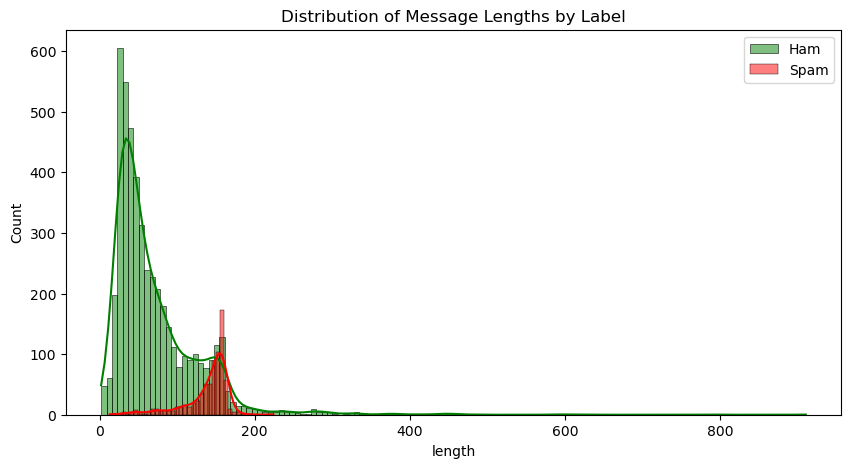

In [17]:
# Add message length column
df['length'] = df['message'].apply(len)

# Plot distribution of message lengths
plt.figure(figsize=(10,5))
sns.histplot(df[df['label'] == 'ham']['length'], color='green', label='Ham', kde=True)
sns.histplot(df[df['label'] == 'spam']['length'], color='red', label='Spam', kde=True)
plt.legend()
plt.title('Distribution of Message Lengths by Label')
plt.show()


In [18]:
# Optional

# # WordCloud for spam
# spam_wc = WordCloud(width=600, height=400, background_color='white').generate(" ".join(df[df['label'] == 'spam']['message']))
# plt.figure(figsize=(8,6))
# plt.imshow(spam_wc, interpolation='bilinear')
# plt.axis('off')
# plt.title('Spam WordCloud')
# plt.show()

# # WordCloud for ham
# ham_wc = WordCloud(width=600, height=400, background_color='white').generate(" ".join(df[df['label'] == 'ham']['message']))
# plt.figure(figsize=(8,6))
# plt.imshow(ham_wc, interpolation='bilinear')
# plt.axis('off')
# plt.title('Ham WordCloud')
# plt.show()


---

## ✅ Phase 1: EDA Summary

- The dataset contains two labels: `ham` and `spam`.
- The dataset is imbalanced (more ham messages than spam).
- Spam messages tend to be longer in character count.
- No missing values detected.
- We’re now ready to preprocess and prepare the data for model building.

Next up: **Text cleaning, label encoding, and vectorization.**


# 📦 Phase 2: Preprocessing & Feature Engineering

## 🏷 Step 1: Encode Labels

We convert categorical labels to numerical values using `LabelEncoder`.  
- `ham` → `0`
- `spam` → `1`


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_num'] = le.fit_transform(df['label'])

# Double check
df[['label', 'label_num']].head()


,label,label_num
0,ham,0
1,ham,0
2,spam,1
3,ham,0
4,ham,0


## 🧼 Step 2: Text Cleaning

We'll lowercase, remove digits, punctuation, and extra whitespace to standardize the text.


In [27]:
import re

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"[^a-z\s]", "", text)  # Remove punctuation/digits
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text
    
df['clean_msg'] = df['message'].apply(clean_text)

# Check before/after
df[['clean_msg','message']].head()


,clean_msg,message
0,go until jurong point crazy available only in ...,"Go until jurong point, crazy.. Available only ..."
1,ok lar joking wif u oni,Ok lar... Joking wif u oni...
2,free entry in a wkly comp to win fa cup final ...,Free entry in 2 a wkly comp to win FA Cup fina...
3,u dun say so early hor u c already then say,U dun say so early hor... U c already then say...
4,nah i dont think he goes to usf he lives aroun...,"Nah I don't think he goes to usf, he lives aro..."


## 🧠 Step 3: Vectorization using TF-IDF

We convert cleaned text into numerical form using TF-IDF (Term Frequency - Inverse Document Frequency).
- `max_features=3000` helps limit vocabulary size and improve efficiency.


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Limit features to avoid overfitting
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df['clean_msg'])
y = df['label_num'].values

X.shape, y.shape

((5572, 8512), (5572,))

# ⚙️ Phase 3: Model Building

## 🧱 Step 1: Train/Test Split

Split the TF-IDF features and target labels (ham/spam) into training and testing sets.


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y #stratify keeps the data of x and y in the same ratio after splitting in train and test as it was in original dataset before splitting
)

## 🧠 Step 2: Train Baseline Models

We’ll try a few models and compare:


#### ✅ Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


LogisticRegression()

#### ✅ Multinomial Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

#### ✅ Support Vector Machine

In [44]:
from sklearn.svm import LinearSVC

svc_model = LinearSVC()
svc_model.fit(X_train, y_train)


LinearSVC()

## 📊 Step 3: Evaluate the Models
We’ll evaluate using:

Accuracy

Precision

Recall

F1-Score

Confusion Matrix

Classification Report

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:\n")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label=1))
    print("Recall:", recall_score(y_test, y_pred, pos_label=1))
    print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# What pos_label does is that it defines what is the positive or true value in the given dataframe


Logistic Regression Evaluation:

Accuracy: 0.9623318385650225
Precision: 0.9908256880733946
Recall: 0.7248322147651006
F1 Score: 0.8372093023255814

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



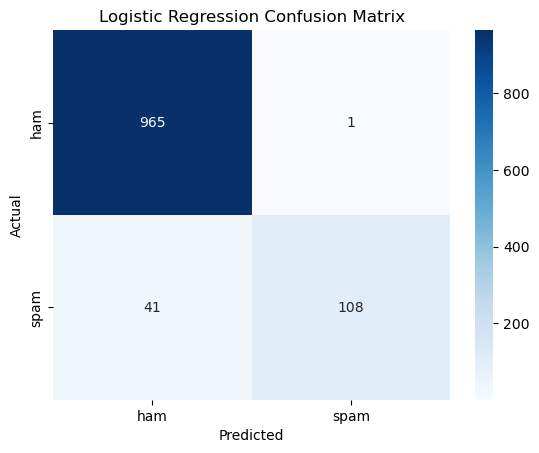


Naive Bayes Evaluation:

Accuracy: 0.9515695067264573
Precision: 1.0
Recall: 0.6375838926174496
F1 Score: 0.7786885245901639

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       1.00      0.64      0.78       149

    accuracy                           0.95      1115
   macro avg       0.97      0.82      0.88      1115
weighted avg       0.95      0.95      0.95      1115



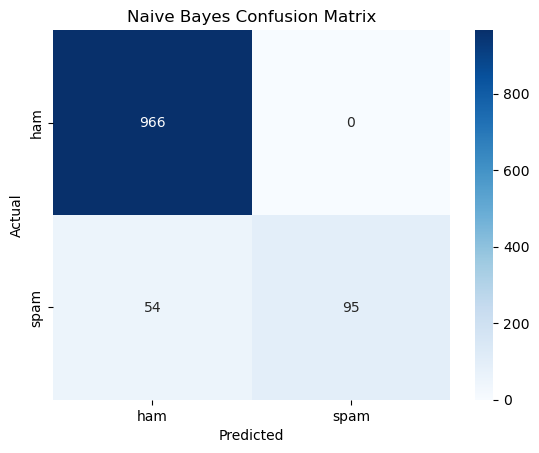


SVM Evaluation:

Accuracy: 0.9829596412556054
Precision: 0.9924242424242424
Recall: 0.8791946308724832
F1 Score: 0.9323843416370107

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.88      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



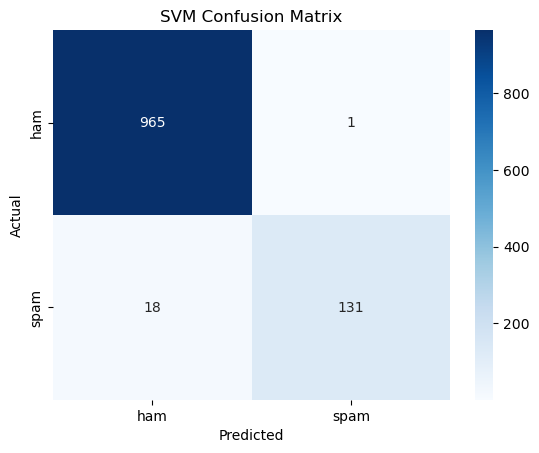

In [53]:
evaluate_model(lr_model, "Logistic Regression")
evaluate_model(nb_model, "Naive Bayes")
evaluate_model(svc_model, "SVM")


## 🔧 Phase 3: Model Building

In this phase, we built and trained multiple machine learning models:
- Logistic Regression
- Naive Bayes
- Support Vector Machine

We evaluated their performance using accuracy, precision, recall, F1 score, and confusion matrix. The best performing model was selected for deployment.
